## Clean and analyze social media usage data with Python
Hello! <br>
I'm Luan (or Lana), a Brazilian non-binary person and I'm 26 years old. Four years ago I found out about Pyhton and data analysis, then I took my time to learn about it and I fell in love for them! Now I fell confortable to start my projects to challenge myself and show the world what I can do and what I learnt.<br>

This is my first data analysis project. I took tips from **Clean and analyze social media usage data with Python** from Coursera's course and I'll do my best to show my results. It's a simple project, but I feel it's a perfect start point to improve my knowledges. <br>

I'll use generated data from *random library* then clean and analyze. After, I'll use some visualization libraries to get insinghts from that data.


First of all, we need to import useful libraries like pandas, numpy, random, matplotlib and seaborn.

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Generating and transforming data
Once libraries were imported we can start generating our data using the random library. <br> After we transform our data, which is a python dictionary, into a pandas dataframe.

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Politics']
social_media = ['Facebook', 'X (former Twitter)', 'Threads', 'Instagram']
data = {'Date': pd.date_range('2021-01-01', periods=1000), 'Category': [random.choice(categories) for _ in range(1000                                                                                                                )],
        'Likes': np.random.randint(0, 10000, size=1000), 'Social Media': [random.choice(social_media) for _ in range(1000)]}
df = pd.DataFrame(data)
df

,Date,Category,Likes,Social Media
0,2021-01-01,Culture,3737,X (former Twitter)
1,2021-01-02,Travel,4066,Facebook
2,2021-01-03,Fashion,2576,Facebook
3,2021-01-04,Politics,3648,Instagram
4,2021-01-05,Travel,7405,Facebook
...,...,...,...,...
995,2023-09-23,Food,8098,Threads
996,2023-09-24,Politics,8949,Instagram
997,2023-09-25,Travel,6663,Threads
998,2023-09-26,Fashion,2643,Threads


#### Analyzing data
When importing data, it's good to check informations about it before working. In this case, we have generated data, which types we already know, but let's check it.

In [3]:
df.dtypes

Date            datetime64[ns]
Category                object
Likes                    int32
Social Media            object
dtype: object

We have datetime (Date), object (Category) and integer (Likes) as dtypes for this dataframe, in this way we can continue our analysis whithout any type transformation. <br>
We can call describe() pandas method to check out basics informations about our dataset.

In [4]:
df.describe()

,Likes
count,1000.000000
mean,4865.849000
std,2885.189828
min,9.000000
25%,2422.750000
50%,4726.500000
75%,7491.750000
max,9999.000000


From this series we can check minimum, maximum, the standard deviation (std) and the main quartiles. <br>
These statistics informations give us a general ideia of our dataset and help us to find better ways to work with. For example, standard deviation is a measure for data variability, i.e its shows us if our data is clustered or spread out. If std is close to mean value, our sample is more clustered, otherwise our sample is spread out. <br>

Since our dataset doesn't need to be cleaned, we can start analyzing it by simple operations and then use these informations to generate graphs and plots for better visualization.

The first operation that we'll use is groupby, which combines our data and makes it's easier to work with.<br>
First of all, we'll groupby by Categories and sum Likes columns to summarize our data. Transforming the resulting Series in a DataFrame makes it's easier to understand and visualize the results.

In [7]:
sum_likes = df.groupby('Category')['Likes'].sum()
sum_likes = pd.DataFrame(sum_likes)
sum_likes.sort_values(by='Likes', ascending=False, inplace=True)
sum_likes

,Likes
Category,
Fashion,802083
Culture,774841
Fitness,767893
Politics,724101
Music,669815
Travel,590965
Food,536151


#### Plotting data
Well, we applied groupby operation successfully, now we can plot our data for better visualization. <br>
Since we have a categorical variable, Category, and a numerical variable, Likes, we can use a barplot as follow.

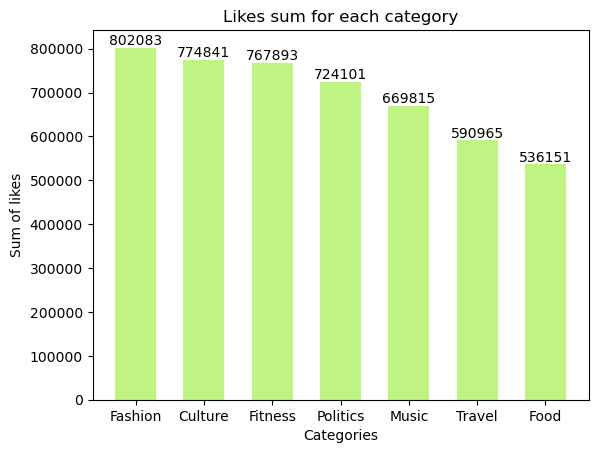

In [36]:
plt.bar(sum_likes.index, sum_likes['Likes'], width=0.6, color='#BFF483')
plt.xlabel('Categories')
plt.ylabel('Sum of likes')
plt.title('Likes sum for each category')
for i, value in enumerate(sum_likes['Likes']):
    plt.text(sum_likes.index[i], value, str(value), ha='center', va='bottom')
plt.show()